In [1]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import os
import pandas as pd
import sys

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../../oso_gcp_credentials.json'
GCP_PROJECT = 'opensource-observer'
client = bigquery.Client(GCP_PROJECT)

In [3]:
query = """
  select
    collection_name,
    project_name
  from `oso.projects_by_collection_v1`
  order by collection_name
"""
pbc = client.query(query).to_dataframe()

In [4]:
pbc[pbc['collection_name'].str.contains('crypto-ecosystems')]['collection_name'].value_counts()

collection_name
ethereum-crypto-ecosystems    1142
polygon-crypto-ecosystems      444
arbitrum-crypto-ecosystems     371
filecoin-crypto-ecosystems     122
base-crypto-ecosystems         119
celo-crypto-ecosystems         108
scroll-crypto-ecosystems        85
Name: count, dtype: int64

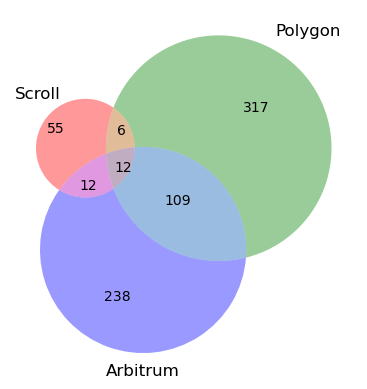

In [5]:
collections = {
    "Scroll": "scroll-crypto-ecosystems", 
    "Polygon": "polygon-crypto-ecosystems", 
    "Arbitrum": "arbitrum-crypto-ecosystems"
}
projects_by_collections = {
    label: set(pbc[pbc['collection_name']==collection_name]['project_name'].unique())
    for label, collection_name in collections.items()
}
v = venn3(
    subsets=list(projects_by_collections.values()),
    set_labels=list(projects_by_collections.keys())
)

In [6]:
query = """
  select
      project_name,
      display_name,
      repository_count,
      first_created_at_date,
      last_updated_at_date,
      star_count,
      fork_count,
      active_developer_count_6_months
  from `oso.code_metrics_by_project_v1`
"""
code_metrics = client.query(query).to_dataframe()

In [7]:
scroll_only_projects = (
    projects_by_collections['Scroll']
    .difference(projects_by_collections['Polygon']
                .union(projects_by_collections['Arbitrum']))
)
print("Scroll only:", len(scroll_only_projects))
shared_projects = (
     projects_by_collections['Scroll']
    .intersection(projects_by_collections['Polygon']
                .union(projects_by_collections['Arbitrum']))
)   
print("Overlap:", len(shared_projects))

Scroll only: 55
Overlap: 30


In [8]:
code_metrics[code_metrics['project_name'].isin(scroll_only_projects)].sort_values(by='last_updated_at_date', ascending=False)

,project_name,display_name,repository_count,first_created_at_date,last_updated_at_date,star_count,fork_count,active_developer_count_6_months
2392,ambient-finance,Ambiant Finance,18,2021-08-09 16:19:34+00:00,2024-11-25 01:07:18+00:00,178,148,3.0
249,scroll-tech,Scroll,115,2021-08-10 03:31:02+00:00,2024-11-25 00:33:23+00:00,6946,3861,38.0
1673,xdefi-tech,XDEFI Technologies,91,2020-08-18 04:30:46+00:00,2024-11-25 00:32:50+00:00,29,32,3.0
2800,dimensiondev,Mask Network,151,2019-01-03 09:54:47+00:00,2024-11-25 00:12:27+00:00,2147,526,9.0
1918,ethereum-attestation-service,Ethereum Attestation Service,16,2020-10-03 15:22:24+00:00,2024-11-25 00:09:37+00:00,470,208,3.0
2531,rango-exchange,Rango Exchange,10,2022-02-10 10:57:02+00:00,2024-11-24 22:01:17+00:00,3719,109,7.0
1603,syncswap,SyncSwap,17,2022-03-05 11:31:50+00:00,2024-11-24 16:58:49+00:00,178,170,2.0
1608,staratlasmeta,Atlas,26,2021-04-24 20:23:11+00:00,2024-11-24 16:51:43+00:00,107,60,3.0
1031,hippospace,Hippo Wallet,14,2022-05-05 07:50:47+00:00,2024-11-24 16:40:13+00:00,271,292,0.0
3390,naturalselectionlabs,Natural Selection Labs (RSS3),34,2021-05-21 20:56:04+00:00,2024-11-24 10:54:32+00:00,474,55,1.0


In [9]:
code_metrics[code_metrics['project_name'].isin(shared_projects)].sort_values(by='last_updated_at_date', ascending=False)

,project_name,display_name,repository_count,first_created_at_date,last_updated_at_date,star_count,fork_count,active_developer_count_6_months
2722,pendle-finance,Pendle,29,2020-12-10 14:04:21+00:00,2024-11-25 02:13:41+00:00,178,147,9.0
111,compound-finance,Compound,77,2018-02-08 21:52:55+00:00,2024-11-25 01:41:39+00:00,3409,2182,11.0
123,crustio,Crust Network,153,2019-11-13 03:33:15+00:00,2024-11-24 12:07:15+00:00,946,513,10.0
117,privy-io,Privy,29,2022-11-10 20:17:10+00:00,2024-11-24 11:15:23+00:00,312,172,13.0
60,automata-network,Automata,144,2020-12-21 02:24:07+00:00,2024-11-24 02:17:45+00:00,294,88,9.0
2529,stargate-finance,Stargate Finance,4,2022-03-16 19:37:25+00:00,2024-11-23 21:36:49+00:00,365,185,6.0
2795,chronicleprotocol,Chronicle Labs (formerly Maker Oracle team),32,2021-10-05 14:42:46+00:00,2024-11-23 19:45:32+00:00,181,84,10.0
2212,sablier,Sablier,45,2018-08-19 16:01:38+00:00,2024-11-23 17:24:47+00:00,865,241,6.0
2814,insta-dapp,InstaDapp,55,2018-10-23 05:32:21+00:00,2024-11-22 22:16:44+00:00,922,441,6.0
1399,irys-xyz,Irys (prev Bundlr),47,2021-07-04 15:18:29+00:00,2024-11-22 09:01:08+00:00,415,296,2.0
